In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

# Style
sns.set_theme(context='talk', style='white', palette='Set2')
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'font.size': 22,
    'axes.titlesize': 'medium',
    'axes.labelsize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'legend.title_fontsize': 'medium',
    'figure.titlesize': 'x-large',
})

# Directories
DATA_DIR = '../../data'
PLOT_DIR = '../plots'

# Seed
np.random.seed(42)

In [36]:
# Choose phenotype
phenotype = 'SCZ'  # 'AD', 'SCZ'

# Read data
df = pd.read_csv(os.path.join(DATA_DIR, 'celltype_importance.csv'))
df = df.rename(columns={
    'celltype': 'Cell Type',
    'cell_group': 'Super',
    'imp_score_mean': 'Prioritization',
    'imp_score_std': 'Prioritization STD',
    'cell_frac_mean': 'Fraction',
    'cell_frac_std': 'Fraction STD',
})
df = df.loc[df['phenotype_x'] == phenotype].drop(columns='phenotype_x')

# # Generate fake data
# df = pd.DataFrame({'Cell Type': [f'CELLTYPE_{i:02}' for i in range(12)]})
# df['Prioritization'] = [np.random.rand() for i in range(df.shape[0])]
# df['std'] = [np.random.rand() for i in range(df.shape[0])]
# df['Fraction'] = [np.random.rand() for i in range(df.shape[0])]

# # Generate fake glial-neuronal classification
# glial_to_neuronal = {
#     ct: ['Glial', 'Neuronal'][np.random.choice(2, 1)[0]]
#     for ct in df['Cell Type'].unique()}

# # Add classification to data
# df['Super'] = df['Cell Type'].map(lambda ct: glial_to_neuronal[ct])

# Sort
df = df.sort_values('Prioritization', ascending=False)

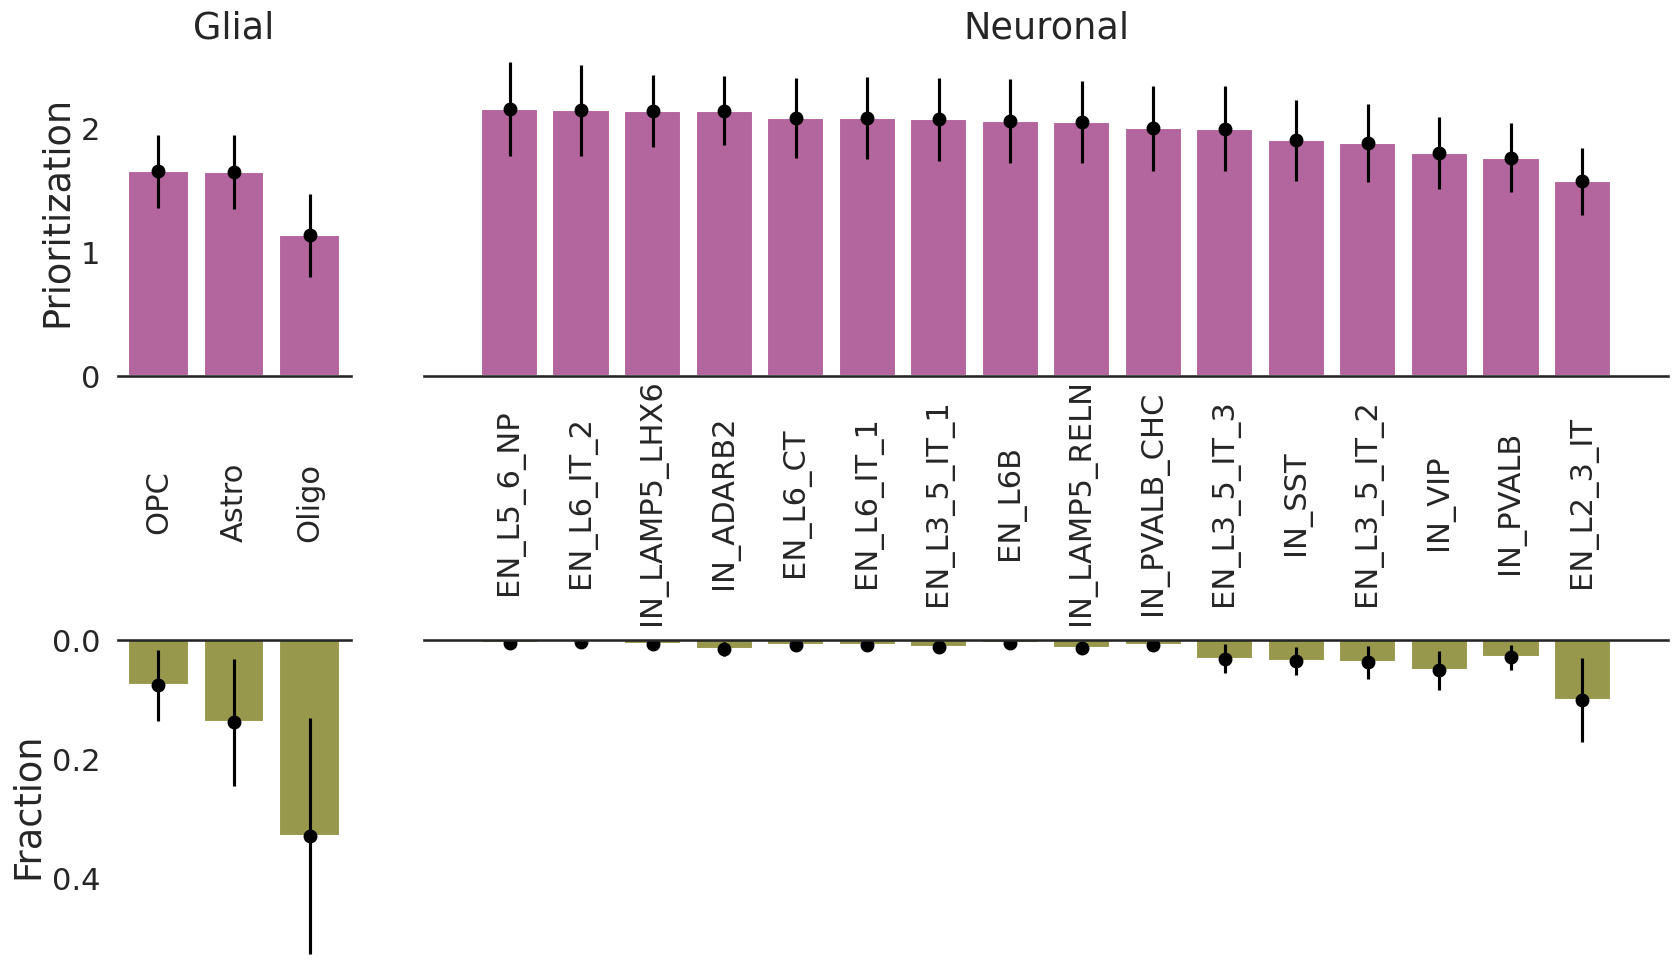

In [37]:
# Parameters
label_hspace = .8
plot_wspace = .1

# Create figure
fig, axs = plt.subplots(
    2, 2,
    gridspec_kw={'hspace': label_hspace, 'wspace': plot_wspace},
    width_ratios=[(df['Super'] == sup).sum() for sup in ('Glial', 'Neuronal')],
    figsize=(20, 12))

# Loop arguments
arrangement = [
    ('Glial', 'Prioritization', (0, 0)),
    ('Neuronal', 'Prioritization', (0, 1)),
    ('Glial', 'Fraction', (1, 0)),
    ('Neuronal', 'Fraction', (1, 1)),
]

# Arrange figure
for super, feature, ax_loc in arrangement:
    # Get params
    ax = axs[ax_loc[0], ax_loc[1]]

    # Filter data
    # TODO: Add sorting
    df_sub = df[(df['Super'] == super)]
    y = df_sub[feature].to_numpy()

    # Plot
    color = '#b3669e' if ax_loc[0] == 0 else '#98984d'
    ax.bar(range(y.shape[0]), y, color=color)

    # Error bars
    ax.errorbar(range(y.shape[0]), y, yerr=df_sub[f'{feature} STD'], fmt='o', color='black')

    # y-conditional formatting
    if ax_loc[0] == 0:  # Top
        # Set title
        ax.set_title(super, fontsize='large')

        # Remove spines
        ax.spines['top'].set_visible(False)

        # Place x Labels
        transform = transforms.blended_transform_factory(ax.transData, fig.transFigure)
        for i, label in enumerate(df_sub['Cell Type'].to_list()):
            ax.text(i, .5, label, ha='center', va='center', rotation=90, transform=transform)

    else:  # Bottom
        # Remove spines
        ax.spines['bottom'].set_visible(False)

    # Set limits
    ax.set_ylim(bottom=0)

    # x-conditional formatting
    if ax_loc[1] == 0:  # Left
        ax.set_ylabel(feature)

    else:  # Right
        # Hide y axis labels
        ax.tick_params(labelleft=False)

    # Hide x axis labels
    ax.tick_params(labelbottom=False)

    # Remove spines
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Match limits (needed otherwise weird prioritization on axis limits when sharing)
for y in range(2):
    # Get ranges
    lim_min = min(axs[y, 0].get_ylim()[0], axs[y, 1].get_ylim()[0])
    lim_max = max(axs[y, 0].get_ylim()[1], axs[y, 1].get_ylim()[1])

    # Set ranges
    axs[y, 0].set_ylim(lim_min, lim_max)
    axs[y, 1].set_ylim(lim_min, lim_max)


# Share axes and invert
for x in range(2): axs[0, x].sharex(axs[1, x])
for y in range(2): axs[y, 0].sharey(axs[y, 1])
axs[1, 0].invert_yaxis()

fig.savefig(os.path.join(PLOT_DIR, f'figure_5_prioritization_{phenotype}.pdf'), bbox_inches='tight')
plt.show()
plt.close()